In [1]:
import os
import librosa
import librosa.display
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = 'GTZAN/genres_original/blues/blues.00000.wav'

In [3]:
y, sr = librosa.load(test)

In [4]:
centroid = librosa.feature.spectral_centroid(y, sr=sr)

In [5]:
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_centroid(S=S)

array([[2122.97750086, 2102.62107328, 1955.28566681, ..., 1490.45684641,
        1507.40421172, 1439.64316125]])

In [6]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)

array([[2122.86408146, 2102.50365201, 1955.20932579, ..., 1490.45571185,
        1507.45375034, 1439.5931547 ]])

[Text(0.5, 1.0, 'log Power spectrogram')]

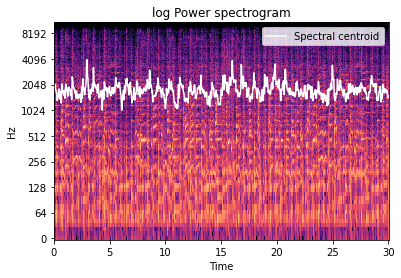

In [7]:
fig, ax = plt.subplots()
times = librosa.times_like(centroid)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, centroid.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')